In [1]:
import tensorflow as tf

In [2]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))

$ f(x,y) = \sqrt{(x^2 +y^2)}$

$ \nabla f(x,y) = \frac{\partial f}{\partial x} \hat{\imath} + \frac{\partial f}{\partial y} \hat{\imath}$

In [5]:
with tf.GradientTape() as tape:
    tape.watch(x)##I want to calcuate gradient wrt x
    f=tf.sqrt(tf.square(x) + tf.square(y))
    df_dx=tape.gradient(f,x)
    print(df_dx)

tf.Tensor(
[[ 0.9717826   0.50861585]
 [-0.09010362 -0.2214592 ]], shape=(2, 2), dtype=float32)


In [7]:
with tf.GradientTape() as tape:
    tape.watch(y)### I want to calculate gradient of y wrt y
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[[ 0.2358785  -0.8609936 ]
 [-0.9959324  -0.97516966]], shape=(2, 2), dtype=float32)


In [9]:
with tf.GradientTape() as tape:
    #tape.watch(x)
    #tape.watch(y)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

None
None


In [10]:
with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

tf.Tensor(
[[ 0.9717826   0.50861585]
 [-0.09010362 -0.2214592 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.2358785  -0.8609936 ]
 [-0.9959324  -0.97516966]], shape=(2, 2), dtype=float32)


# Without using tape we can calculate gradient by using tf.Variable

In [11]:
x1=tf.Variable(tf.random.normal(shape=(2,2)))
y1=tf.Variable(tf.random.normal(shape=(2,2)))

In [13]:
with tf.GradientTape() as tape:
    f=tf.sqrt(tf.square(x1)+tf.square(y1))
    df_dx,df_dy=tape.gradient(f,[x1,y1])
    print(df_dx)
    print(df_dy)

tf.Tensor(
[[0.91369456 0.9852344 ]
 [0.22150484 0.20765918]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.40640152  0.17121102]
 [-0.9751592  -0.97820115]], shape=(2, 2), dtype=float32)


In [14]:
x=tf.Variable(3.)
y=tf.Variable(2.)


In [15]:
with tf.GradientTape() as tape:
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


## Simple Linear Regreassion Example

$ f(x) =W.x +b $

In [21]:
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLES=1000
x=tf.random.normal(shape=[NUM_EXAMPLES])

In [22]:
noise=tf.random.normal(shape=[NUM_EXAMPLES])

In [23]:
y=x*TRUE_W + TRUE_B + noise

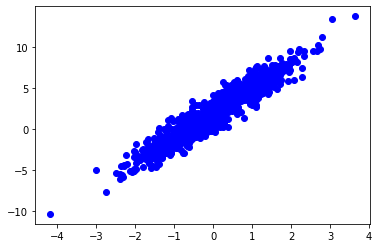

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c="b")
plt.show()

In [28]:
y=x*TRUE_W + TRUE_B 

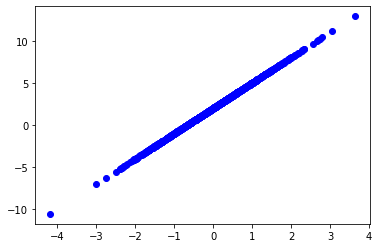

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c="b")
plt.show()

# Lest define a model

In [ ]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        #initialize weights
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        
        selt.w*x+self.b